# Ejercicio 1 - Python

SE PIDE: 

Sobre los informes de felicidad de 2015 y 2016, realizar las siguientes exploraciones: 
1. Cargar los dos CSV como datasets. 

2. Identifica las columnas de ambos datasets: ¿hay diferencias entre ambos? 

3. Une ambos dataframes, sin importar que los dos compartan las mismas diferencias. 

4. Revisa el número de nulos que hay por cada columna, así como su porcentaje. 

5. Cambia los valores nulos de las columnas "Lower Confidence Interval" y "Upper Confidence Interval" por un número aleatorio entre el valor mínimo y máximo de la misma columna (un único número, no es necesario uno diferente para cada fila con valor nulo). 

6. Cambia los valores nulos de la columna "Standard Error" por su media al cuadrado. 

7. Obtén un resumen estadístico del dataframe sin valores nulos. 

8. Muestra de forma gráfica la relación entre la familia y la salud. 

9. Muestra de forma gráfica la relación entre la puntuación de felicidad y la confianza (corrupción del gobierno). 

10. Muestra la matriz de correlación del daframe. 

11. Tras unir los dataframes, los países aparecerán más de una vez. Muestra agrupado el dataframe por país con el valor máximo de felicidad, sin importar el año. 

12. ¿Tiene relación la felicidad con la generosidad? Muéstralo gráficamente a través de la puntuación de libertad. 

13. Muestra la distribución del grado de distopía en función de la región. 

# Solución

### 1. Cargar los dos CSV como datasets. 

In [2]:
import pandas as pd
import numpy as np

In [2]:
df_2015 = pd.read_csv('informe felicidad 2015.csv')
df_2016 = pd.read_csv('informe felicidad 2016.csv')

### 2. Identifica las columnas de ambos datasets: ¿hay diferencias entre ambos?

In [3]:
print(df_2015.columns)
print(df_2015.shape)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')
(158, 12)


In [4]:
print(df_2016.columns)
print(df_2016.shape)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')
(157, 13)


Hay diferencias en las columnas de ambos datasets. Coinciden 11 variables, excepto: 'Standard Error', 'Lower Confidence Interval' y 'Upper Confidence Interval'.

### 3. Une ambos dataframes, sin importar que los dos compartan las mismas diferencias.

In [5]:
# Uso de la función (join) con 'outer' para realizar la unión por todos los elementos
df_united = pd.concat([df_2015, df_2016], ignore_index=True, join='outer')

df_united.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Lower Confidence Interval,Upper Confidence Interval
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,NaN,NaN
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,NaN,NaN
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,NaN,NaN
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,NaN,NaN
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,NaN,NaN


### 4. Revisa el número de nulos que hay por cada columna, así como su porcentaje. 

In [6]:
# Realizamos este ejercicio a través de la siguiente función:
def show_nulls(df_united):
    
    total_nan = df_united.isnull().sum()
    
    perc_nan = total_nan/len(df_united)*100
    
    return total_nan, perc_nan

In [7]:
print('TOTAL NULLS VALUES:\n', show_nulls(df_united=df_united)[0])

TOTAL NULLS VALUES:
 Country                            0
Region                             0
Happiness Rank                     0
Happiness Score                    0
Standard Error                   157
Economy (GDP per Capita)           0
Family                             0
Health (Life Expectancy)           0
Freedom                            0
Trust (Government Corruption)      0
Generosity                         0
Dystopia Residual                  0
Lower Confidence Interval        158
Upper Confidence Interval        158
dtype: int64


In [8]:
print('PERCENTAGE OF NULLS VALUES:\n', show_nulls(df_united=df_united)[1])

PERCENTAGE OF NULLS VALUES:
 Country                           0.00000
Region                            0.00000
Happiness Rank                    0.00000
Happiness Score                   0.00000
Standard Error                   49.84127
Economy (GDP per Capita)          0.00000
Family                            0.00000
Health (Life Expectancy)          0.00000
Freedom                           0.00000
Trust (Government Corruption)     0.00000
Generosity                        0.00000
Dystopia Residual                 0.00000
Lower Confidence Interval        50.15873
Upper Confidence Interval        50.15873
dtype: float64


Los valores nulos se encuentran en las variables: "Standard Error", "Lower Confidence Interval" y "Upper Confidence Interval", coincidiendo con las columnas diferentes de ambos datasets, como se comprobó en el ejercicio 2.

### 5. Cambia los valores nulos de las columnas "Lower Confidence Interval" y "Upper Confidence Interval" por un número aleatorio entre el valor mínimo y máximo de la misma columna (un único número, no es necesario uno diferente para cada fila con valor nulo). 

In [9]:
import random

#Retomamos el dataframe de partida
df_united = pd.concat([df_2015, df_2016], ignore_index=True, join='outer')

#Primero, se realiza el cambio para la columna "Lower Cofidence Interval"
min_lower=df_united ['Lower Confidence Interval'].min()
max_lower=df_united ['Lower Confidence Interval'].max()

print('Min_column_lower = ', min_lower)
print('Max_colum_lower = ', max_lower)

for i in range(1):
    random_lower=random.uniform(min_lower, max_lower)
print('Random_column_lower', random_lower)

df_united['Lower Confidence Interval']=df_united['Lower Confidence Interval'].fillna(random_lower)

#Segundo, se realiza el cambio para la columna "Upper Cofidence Interval"
min_upper=df_united ['Upper Confidence Interval'].min()
max_upper=df_united ['Upper Confidence Interval'].max()

print('Min_column_upper = ', min_upper)
print('Max_colum_upper = ', max_upper)

for i in range(1):
    random_upper=random.uniform(min_upper, max_upper)
print('Random_column_upper', random_upper)

df_united['Upper Confidence Interval']=df_united['Upper Confidence Interval'].fillna(random_upper)

#Por último, se muestra el resultado final
df_united.head()

Min_column_lower =  2.732
Max_colum_lower =  7.46
Random_column_lower 6.919368688094313
Min_column_upper =  3.078
Max_colum_upper =  7.669
Random_column_upper 4.574765771555223


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Lower Confidence Interval,Upper Confidence Interval
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,6.919369,4.574766
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,6.919369,4.574766
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,6.919369,4.574766
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,6.919369,4.574766
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,6.919369,4.574766


### 6. Cambia los valores nulos de la columna "Standard Error" por su media al cuadrado.

In [10]:
# Eliminamos los valores nulos de la columna
standard_error_dropna = df_united['Standard Error'].dropna()

# Calculamos la media al cuadrado
standard_error_mean_square = standard_error_dropna.mean()**2
standard_error_mean_square

0.002292948979494472

In [11]:
# Reemplazamos los nulos y obtenemos un nuevo dataframe
df_united_2 = df_united.fillna(standard_error_mean_square)

df_united_2.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Lower Confidence Interval,Upper Confidence Interval
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,6.919369,4.574766
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,6.919369,4.574766
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,6.919369,4.574766
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,6.919369,4.574766
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,6.919369,4.574766


###  7. Obtén un resumen estadístico del dataframe sin valores nulos. 

In [12]:
df_united_2.describe

<bound method NDFrame.describe of          Country                           Region  Happiness Rank  \
0    Switzerland                   Western Europe               1   
1        Iceland                   Western Europe               2   
2        Denmark                   Western Europe               3   
3         Norway                   Western Europe               4   
4         Canada                    North America               5   
..           ...                              ...             ...   
310        Benin               Sub-Saharan Africa             153   
311  Afghanistan                    Southern Asia             154   
312         Togo               Sub-Saharan Africa             155   
313        Syria  Middle East and Northern Africa             156   
314      Burundi               Sub-Saharan Africa             157   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
0              7.587        0.034110                   1.39651

### 8. Muestra de forma gráfica la relación entre la familia y la salud. 

In [13]:
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

Text(29.000000000000007, 0.5, 'Salud')

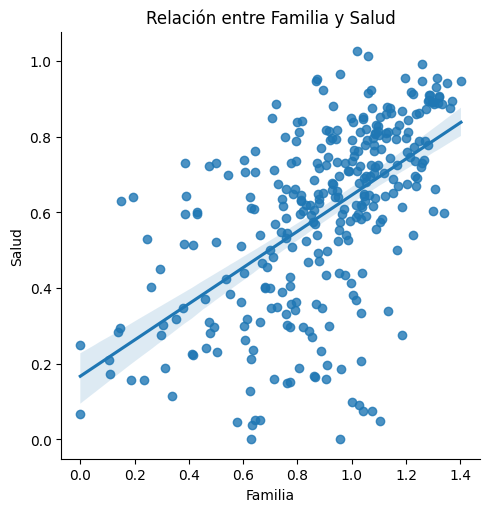

In [14]:
sns.lmplot(x = 'Family', y = 'Health (Life Expectancy)', data = df_united_2)

plt.title('Relación entre Familia y Salud')
plt.xlabel('Familia')
plt.ylabel('Salud')

A pesar de que existen valores con una amplia dispersión (algunos puntos de la nube se alejan de la recta de ajuste), la relación entre familia y salud es positiva y significativa.

### 9. Muestra de forma gráfica la relación entre la puntuación de felicidad y la confianza (corrupción del gobierno). 

Text(29.000000000000007, 0.5, 'Confianza (corrupción del gobierno)')

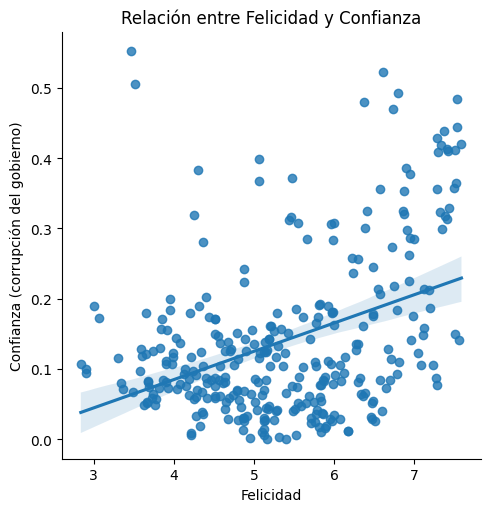

In [15]:
sns.lmplot(x = "Happiness Score", y = 'Trust (Government Corruption)', data = df_united_2)

plt.title('Relación entre Felicidad y Confianza')
plt.xlabel('Felicidad')
plt.ylabel('Confianza (corrupción del gobierno)')

En esta gráfica también se muestra una amplia dispersión de los valores y, aunque la relación entre felicidad y confianza es positiva, se puede decir que es moderada atendiendo a la pendiente de la recta de regresión.

### 10. Muestra la matriz de correlación del daframe. 

In [16]:
df_united_2.corr()

/var/folders/cf/7nzhdlvs5nl0_zh6ky9hz9vc0000gn/T/ipykernel_4481/325117410.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_united_2.corr()


,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Lower Confidence Interval,Upper Confidence Interval
Happiness Rank,1.000000,-0.993905,0.057798,-0.783247,-0.686502,-0.741182,-0.545570,-0.378864,-0.152613,-0.522146,-0.487843,-0.612169
Happiness Score,-0.993905,1.000000,-0.061461,0.779171,0.693547,0.734491,0.556414,0.397989,0.168272,0.526343,0.492949,0.614258
Standard Error,0.057798,-0.061461,1.000000,-0.186844,0.266522,0.027844,0.126096,-0.039259,-0.046720,-0.151971,0.628563,-0.435713
Economy (GDP per Capita),-0.783247,0.779171,-0.186844,1.000000,0.566283,0.789103,0.331127,0.294856,-0.015402,0.079411,0.299756,0.550767
Family,-0.686502,0.693547,0.266522,0.566283,1.000000,0.569937,0.476671,0.205060,0.075987,0.053264,0.586954,0.249740
Health (Life Expectancy),-0.741182,0.734491,0.027844,0.789103,0.569937,1.000000,0.369799,0.249773,0.088002,0.025248,0.470285,0.369730
Freedom,-0.545570,0.556414,0.126096,0.331127,0.476671,0.369799,1.000000,0.492875,0.356615,0.034829,0.407329,0.240743
Trust (Government Corruption),-0.378864,0.397989,-0.039259,0.294856,0.205060,0.249773,0.492875,1.000000,0.289499,-0.023504,0.210624,0.222664
Generosity,-0.152613,0.168272,-0.046720,-0.015402,0.075987,0.088002,0.356615,0.289499,1.000000,-0.110632,0.065830,0.108173
Dystopia Residual,-0.522146,0.526343,-0.151971,0.079411,0.053264,0.025248,0.034829,-0.023504,-0.110632,1.000000,0.114211,0.426453


/var/folders/cf/7nzhdlvs5nl0_zh6ky9hz9vc0000gn/T/ipykernel_4481/2128899387.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_united_2.corr(), cmap='Greens')


<AxesSubplot: >

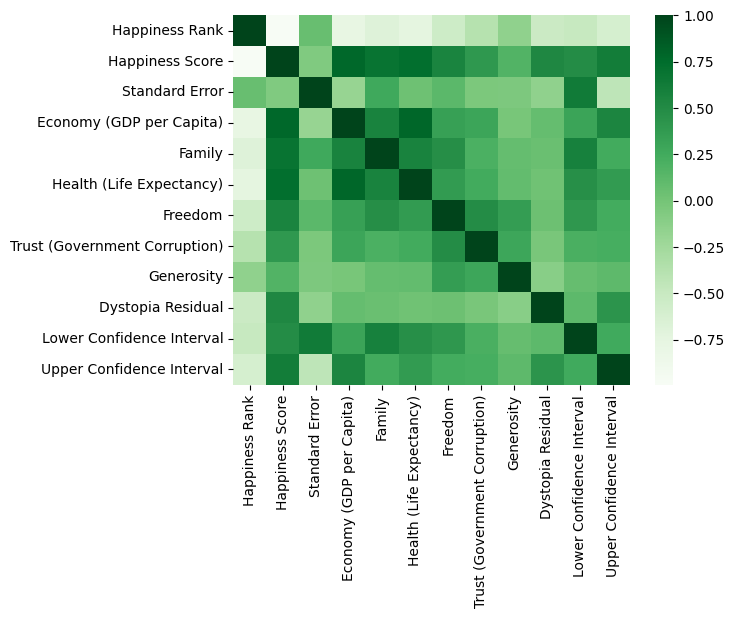

In [17]:
# De manera gráfica:
sns.heatmap(df_united_2.corr(), cmap='Greens')

### 11. Tras unir los dataframes, los países aparecerán más de una vez. Muestra agrupado el dataframe por país con el valor máximo de felicidad, sin importar el año.

In [18]:
# Creamos un nuevo dataframe para visualizar mejor los datos
# Agrupamos con la función 'groupby' para la columna de países y seleccionamos el valor máximo de felicidad
df_united_3 = df_united_2.groupby(['Country']).max(['Happiness Score'])
df_united_3

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Lower Confidence Interval,Upper Confidence Interval
Country,,,,,,,,,,,,
Afghanistan,154,3.575,0.03084,0.38227,0.30285,0.30335,0.23414,0.09719,0.36510,2.14558,6.919369,4.574766
Albania,109,4.959,0.05013,0.95530,0.80434,0.81325,0.35733,0.06413,0.16840,1.92816,6.919369,4.764000
Algeria,68,6.355,0.05099,1.05266,1.07772,0.61804,0.28579,0.17383,0.07822,3.40904,6.919369,6.483000
Angola,141,4.033,0.04758,0.84731,0.86040,0.16683,0.10384,0.08434,0.12344,2.09459,6.919369,4.574766
Argentina,30,6.650,0.04612,1.15137,1.24823,0.78723,0.44974,0.08484,0.11451,3.12985,6.919369,6.740000
...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,44,6.810,0.06476,1.13367,1.25596,0.72052,0.42908,0.11069,0.05841,3.19131,6.919369,6.195000
Vietnam,96,5.360,0.03107,0.74037,0.91226,0.74676,0.59444,0.11556,0.25075,2.20173,6.919369,5.131000
Yemen,147,4.077,0.04367,0.57939,0.68093,0.40064,0.35571,0.07854,0.09821,1.97295,6.919369,4.574766


### 12. ¿Tiene relación la felicidad con la generosidad? Muéstralo gráficamente a través de la puntuación de libertad. 

In [19]:
from plotnine import *

/opt/homebrew/lib/python3.11/site-packages/plotnine/stats/smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


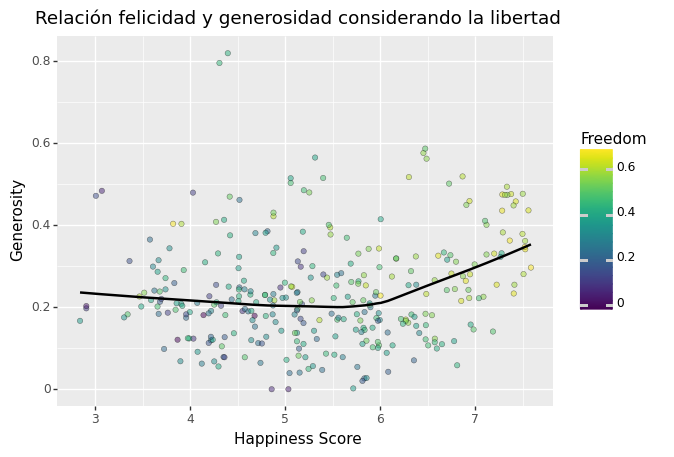

<ggplot: (389483293)>

In [20]:
(
    ggplot(df_united_2) +
     geom_point(aes(x='Happiness Score', y = 'Generosity', 
                    fill = 'Freedom'),
               alpha=0.5,
               shape='o',
               size = 2,
               stroke = 0.2) 
    + geom_smooth(
        aes(x='Happiness Score', y = 'Generosity')
    )
    + labs(title='Relación felicidad y generosidad considerando la libertad')
)

La relación entre felicidad y generosidad es baja y ligeramente decreciente, si bien esta tendencia varía en niveles altos de felicidad aumentando los valores de generosidad, coincidiendo con valores altos de libertad.

### 13. Muestra la distribución del grado de distopía en función de la región. 

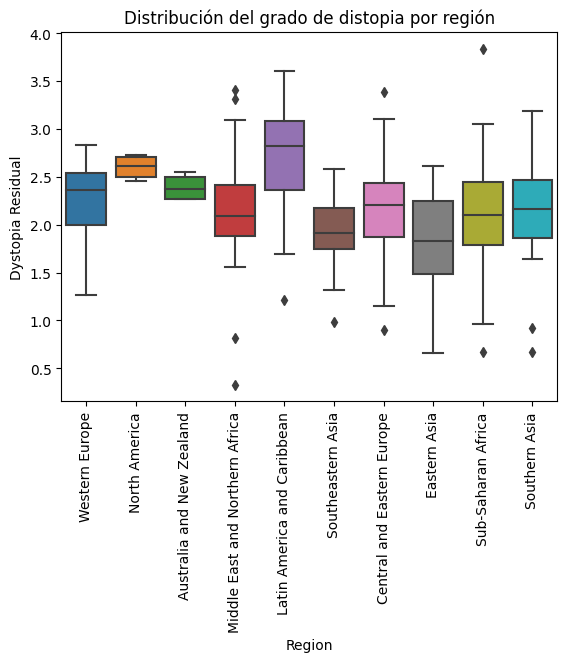

In [21]:
sns.boxplot(x='Region', y='Dystopia Residual', data = df_united_2)
plt.xticks(rotation=90)
plt.title('Distribución del grado de distopia por región')
plt.show()

El grado más alto de distopía se aprecia en los países de América Latina y el Caribe, por lo que estos tienen los promedios nacionales más bajos en producción económica, apoyo social, esperanza de vida, libertad, ausencia de corrupción y generosidad. El grado más bajo de distopía, atendiendo a la mediana, se observa en el este Asiático, aunque las puntuaciones tienen una amplia dispersión. En relación con esto último, los países donde la dispersión es menor son Norteamérica, Australia y Nueva Zelanda. Y los países en los que se aprecia un mayor número de valores atípicos son el medio este y norte de África.